# Анализ регрессионных остатков

Рассмотрим регрессионную модель
$$
y_i = \sum_{j = 1}^m w_j x_{ij} + \epsilon_i
$$

Анализ заключается в проверке следующих гипотез:
* $E\epsilon_i = 0$
* $D\epsilon_i = \sigma^2$
* $\epsilon_i \sim N(0, \sigma)$
* все $\epsilon_i$ - независимы,
где
$$
    \epsilon_i = y_i - f_i
$$

In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Пример хорошей модели

In [2]:
N = 1000
M = 10

In [3]:
x = np.linspace(0, 6 * np.pi, N)
e = np.random.randn(N)

In [4]:
y = 5 * x

In [5]:
yp = y + e

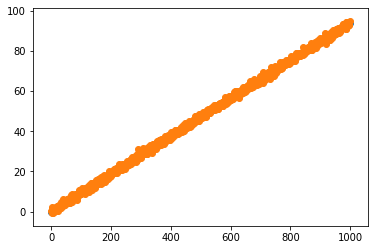

In [6]:
plt.scatter(np.arange(N), y)
plt.scatter(np.arange(N), yp)

In [7]:
model = sm.OLS(yp, x)
results = model.fit()

In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.047e+06
Date:                Tue, 21 Jan 2020   Prob (F-statistic):                        0.00
Time:                        09:17:37   Log-Likelihood:                         -1404.0
No. Observations:                1000   AIC:                                      2810.
Df Residuals:                     999   BIC:                                      2815.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.9986      0.003   1745.697      0.000       4.993       5.004
==============================================================================
Omnibus:                        0.122   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.941   Jarque-Bera (JB):                0.159
Skew:                          -0.025   Prob(JB):                        0.924
Kurtosis:                       2.964   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Пример плохой модели модели

In [9]:
y = 4 * x

In [10]:
yp = y + np.sin(x) * (4 * np.random.randn(N) + 5)

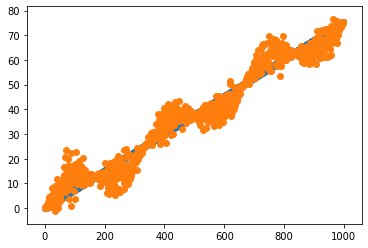

In [11]:
plt.scatter(np.arange(N), y)
plt.scatter(np.arange(N), yp)

In [12]:
model = sm.OLS(yp, x)
results = model.fit()

In [13]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                          9.087e+04
Date:                Tue, 21 Jan 2020   Prob (F-statistic):                        0.00
Time:                        09:17:51   Log-Likelihood:                         -2928.5
No. Observations:                1000   AIC:                                      5859.
Df Residuals:                     999   BIC:                                      5864.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.9645      0.013    301.447      0.000       3.939       3.990
==============================================================================
Omnibus:                       14.547   Durbin-Watson:                   0.821
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.729
Skew:                           0.199   Prob(JB):                     0.000141
Kurtosis:                       3.517   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""